<a href="https://colab.research.google.com/github/josepefg/analises-de-dados/blob/master/airbnb/Airbnb_Sydney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.linkedin.com/in/josepegerent"> <img border="0" alt="Linkedin" src="https://img.shields.io/badge/Autor-josepefg-red.svg"> </a>
# **Análise do Airbnb**  
O [Airbnb](https://www.airbnb.com.br/) disponibiliza dados do site referentes aos aluguéis para algumas das principais cidades do mundo. A partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar esses dados para serem analisado.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Como eu já morei na Austrália resolvi baixar os dados de Sydney para fazer uma análise dos aluguéis por região.

# **Obtenção dos dados**  
Os dados foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html), mais especificamente o arquivo [listings](http://data.insideairbnb.com/australia/nsw/sydney/2020-06-11/visualisations/listings.csv), que, como informado no site traz um resumo das informações e das métricas e é ideal para visualizações.

In [1]:
# importar os pacotes necessários
import warnings
warnings.filterwarnings("ignore", category=Warning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/australia/nsw/sydney/2020-06-11/visualisations/listings.csv")

# **Análise dos dados** 
Entender a estrutura e a descrição dos dados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86917,151.22656,Private room,64,2,196,2020-03-13,1.53,1,364
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86515,151.19190,Private room,14314,2,526,2019-09-22,4.37,2,0
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80093,151.26172,Entire home/apt,471,5,2,2019-01-02,0.04,2,173
3,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,130,3,76,2020-01-03,0.65,1,0
4,58506,"Studio Yindi @ Mosman, Sydney",279955,John,NaN,Mosman,-33.81927,151.23652,Entire home/apt,140,2,280,2020-04-23,2.43,1,267


## Quais as dimensões do dataset?

In [6]:
print("Linhas: {} \nColunas: {} ".format(df.shape[0], df.shape[1]))

Linhas: 36901 
Colunas: 16 


## Quais os tipos das colunas?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36901 entries, 0 to 36900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36901 non-null  int64  
 1   name                            36889 non-null  object 
 2   host_id                         36901 non-null  int64  
 3   host_name                       36894 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36901 non-null  object 
 6   latitude                        36901 non-null  float64
 7   longitude                       36901 non-null  float64
 8   room_type                       36901 non-null  object 
 9   price                           36901 non-null  int64  
 10  minimum_nights                  36901 non-null  int64  
 11  number_of_reviews               36901 non-null  int64  
 12  last_review                     

Aqui já podemos perceber que a coluna neighbourhood_group não tem nenhum valor preenchido, então já é uma candidata a ser excluída.

## Qual a porcentagem de valores ausentes de cada coluna?

In [24]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).map('{:.2%}'.format)

neighbourhood_group               100.00%
reviews_per_month                  27.84%
last_review                        27.84%
name                                0.03%
host_name                           0.02%
availability_365                    0.00%
calculated_host_listings_count      0.00%
number_of_reviews                   0.00%
minimum_nights                      0.00%
price                               0.00%
room_type                           0.00%
longitude                           0.00%
latitude                            0.00%
neighbourhood                       0.00%
host_id                             0.00%
id                                  0.00%
dtype: object

A coluna neighbourhood_group não possui nenhuma entrada, enquanto que as colunas reviews_per_month e last_review têm 27,84% de seus dados faltando. 

## Como estão distribuídas as variáveis?

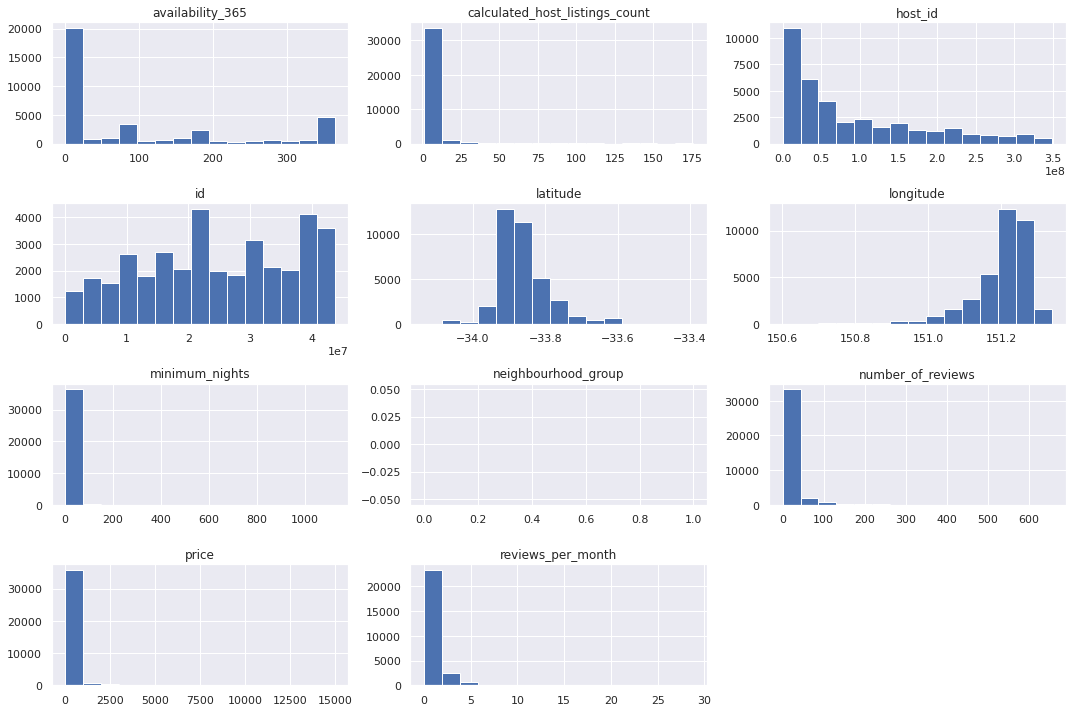

In [26]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))
plt.tight_layout()

## Há outliers nesse dataset?
O histograma nos dá indícios de que algumas colunas possam ter outliers. Vamos analisar essas colunas através de uma análise estatística e plotar o boxplot delas.

### Resumo estatístico

In [27]:
# resumo estatístico dos dados numéricos
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.690100e+04,3.690100e+04,0.0,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,26628.000000,36901.000000,36901.000000
mean,2.453288e+07,9.131863e+07,NaN,-33.863215,151.198786,227.003333,6.106257,14.866995,0.784623,7.252134,95.462697
std,1.228760e+07,9.191494e+07,NaN,0.072964,0.088700,443.456850,27.658358,36.144464,1.172487,22.746438,129.994717
min,1.115600e+04,1.409300e+04,NaN,-34.135590,150.601470,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.499574e+07,1.828597e+07,NaN,-33.899450,151.175530,79.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,2.379250e+07,5.116167e+07,NaN,-33.882000,151.213460,130.000000,2.000000,2.000000,0.300000,1.000000,0.000000
75%,3.577880e+07,1.506891e+08,NaN,-33.829520,151.258910,220.000000,5.000000,11.000000,0.990000,2.000000,178.000000
max,4.373676e+07,3.492491e+08,NaN,-33.390750,151.339870,15000.000000,1125.000000,657.000000,28.820000,176.000000,365.000000


Analisando principalmente a distribuição de 75% dos dados e os máximos podemos verificar que realmente temos outliers.

In [28]:
# estatística dos dados categóricos
df.describe(include=['O'])

,name,host_name,neighbourhood,room_type,last_review
count,36889,36894,36901,36901,26628
unique,35976,8205,38,4,1868
top,Home away from home,David,Sydney,Entire home/apt,2020-01-01
freq,22,344,9364,22641,447


### Boxplots e IQR das variáveis com outliers  
O Boxplot utiliza a Amplitude Interquartil (IQR) para a visualização dos outliers. Portanto iremos utilizar essa mesma técnica para remover os outliers do dataframe.

#### Boxplots

#### price

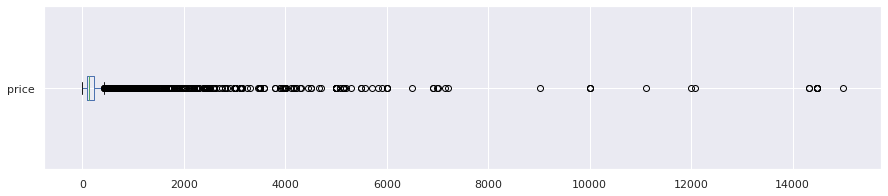

In [31]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

#### minimun_nights

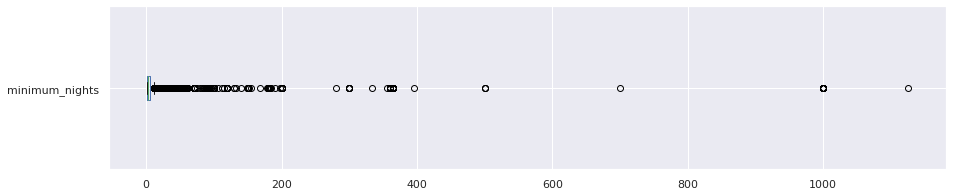

In [32]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#### number_of_reviews

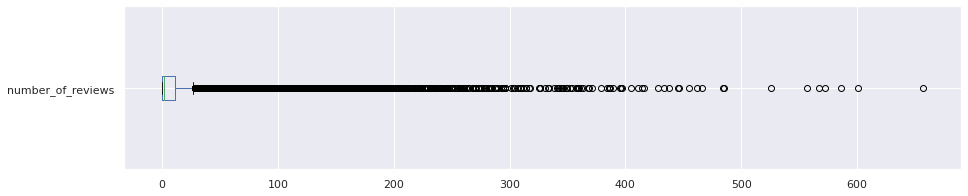

In [33]:
# number_of_reviews
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#### reviews_per_month

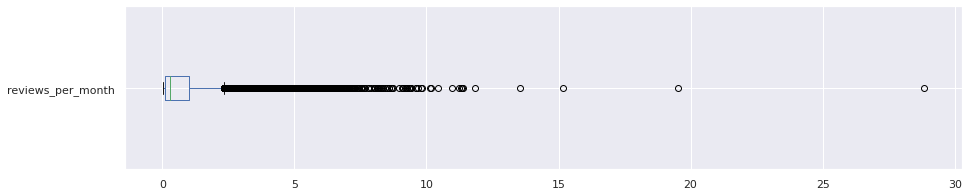

In [34]:
# reviews_per_month
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#### calculated_host_listings_count

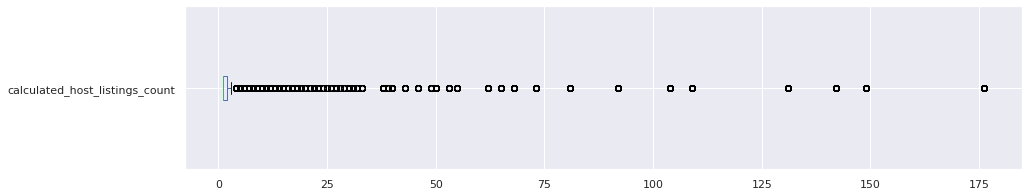

In [35]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#### availability_365

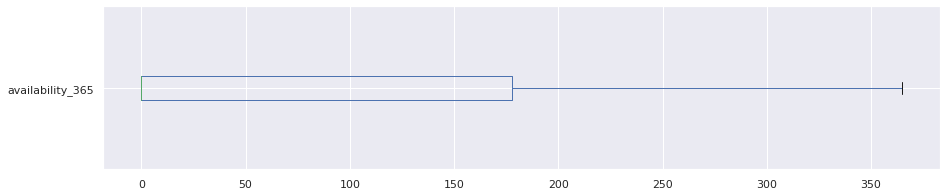

In [36]:
# availability_365
df.availability_365.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#### IQR
Amplitude Interquartil

In [37]:
# Selecionando as colunas a serem limpas
cols = ['price', 'minimum_nights', 'number_of_reviews',	'reviews_per_month', 'calculated_host_listings_count',	'availability_365']
df_sel = df[cols]

In [38]:
Q1 = df_sel.quantile(0.25)
Q3 = df_sel.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price                             141.00
minimum_nights                      4.00
number_of_reviews                  11.00
reviews_per_month                   0.89
calculated_host_listings_count      1.00
availability_365                  178.00
dtype: float64


#### Limpando o dataset removendo os outliers de todas as colunas

In [39]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [40]:
df_out.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.153100e+04,2.153100e+04,0.0,21531.000000,21531.000000,21531.00000,21531.000000,21531.000000,14993.000000,21531.000000,21531.000000
mean,2.430821e+07,8.648840e+07,NaN,-33.868280,151.198669,137.60745,3.072965,3.920347,0.322520,1.279829,62.026891
std,1.204778e+07,8.900551e+07,NaN,0.068161,0.088366,89.14134,2.182483,5.678924,0.403984,0.565333,111.217191
min,6.512600e+04,1.503000e+04,NaN,-34.100160,150.601470,0.00000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.480710e+07,1.940205e+07,NaN,-33.903225,151.171095,70.00000,1.000000,0.000000,0.060000,1.000000,0.000000
50%,2.306278e+07,4.978310e+07,NaN,-33.886010,151.215560,110.00000,2.000000,1.000000,0.170000,1.000000,0.000000
75%,3.512519e+07,1.332110e+08,NaN,-33.834060,151.260475,180.00000,4.000000,5.000000,0.390000,1.000000,89.000000
max,4.373676e+07,3.492491e+08,NaN,-33.399910,151.339870,430.00000,11.000000,27.000000,2.310000,3.000000,365.000000


### Histogramas sem outliers

In [41]:
# criando uma cópia do dataframe
df_cp = df_out.copy()

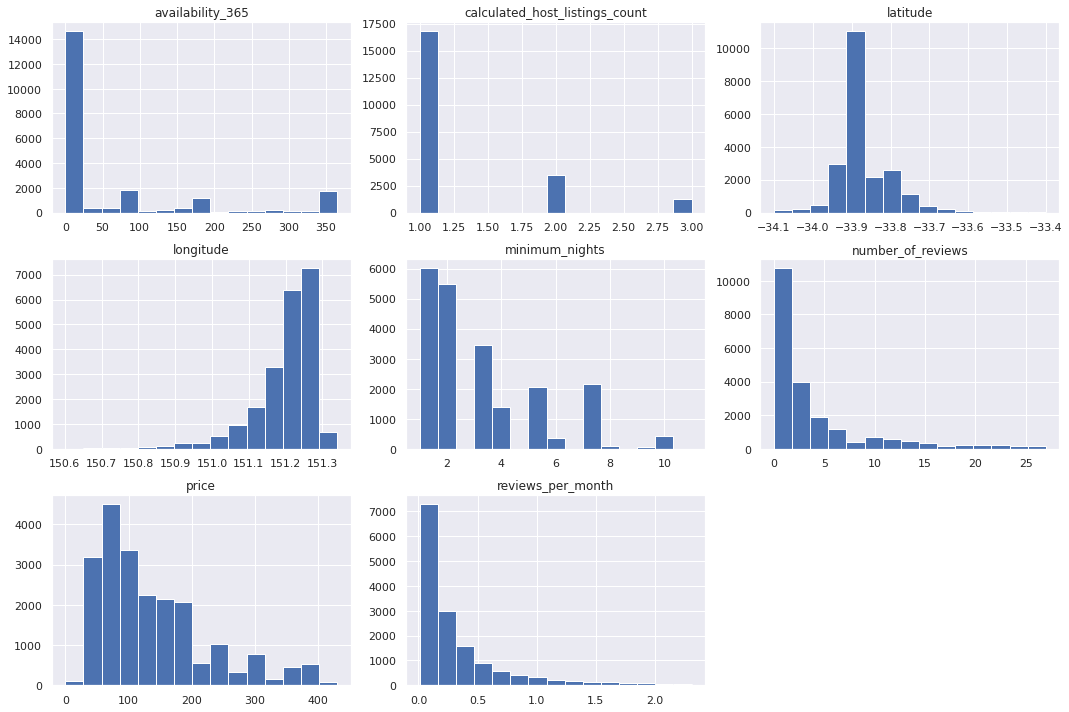

In [43]:
# remover os *outliers* em um novo DataFrame e colunas vazias
df_clean = df_cp.copy()

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# remover "host_id" e "id" pois são variáveis sem valor estatístico
df_clean.drop('host_id', axis=1, inplace=True)
df_clean.drop('id', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10))
plt.tight_layout()

Agora conseguimos visualizar melhor os histogramas. 

## Existe correlação entre as variáveis?

In [44]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

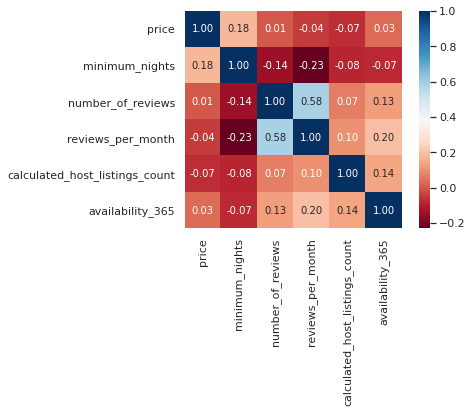

In [45]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Imóveis mais alugados

### Por tipo

In [46]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    11463
Private room        9611
Shared room          434
Hotel room            23
Name: room_type, dtype: int64

In [49]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]).sort_values(ascending=False).map('{:.2%}'.format)

Entire home/apt    53.24%
Private room       44.64%
Shared room         2.02%
Hotel room          0.11%
Name: room_type, dtype: object

### Por Bairro

In [ ]:
# mostrar a quantidade de imóvel por bairros
df_clean.neighbourhood.value_counts()[:10]

Sydney          4702
Waverley        3444
Randwick        2179
Warringah       1140
Manly            965
Woollahra        933
Marrickville     826
North Sydney     748
Rockdale         586
Leichhardt       517
Name: neighbourhood, dtype: int64

In [50]:
# mostrar a porcentagem de imóvel por bairro
((df_clean.neighbourhood.value_counts() / df_clean.shape[0])[:10]).sort_values(ascending=False).map('{:.2%}'.format)

Sydney          21.84%
Waverley        16.00%
Randwick        10.12%
Warringah        5.29%
Manly            4.48%
Woollahra        4.33%
Marrickville     3.84%
North Sydney     3.47%
Rockdale         2.72%
Leichhardt       2.40%
Name: neighbourhood, dtype: object

Só para explicar, quando aparece o bairro Sydney ele se refere ao centro da cidade.

## Preço médio do aluguel

### Por tipo

In [51]:
df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)[:10]

room_type
Entire home/apt    186.426503
Hotel room         163.000000
Private room        82.798668
Shared room         60.580645
Name: price, dtype: float64

### Por bairro

Os mais caros

In [52]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Pittwater           216.066158
Manly               183.970984
Hunters Hill        177.093750
Leichhardt          166.425532
Warringah           164.071053
Mosman              161.947598
Waverley            156.363240
Sutherland Shire    156.170418
Woollahra           153.207931
North Sydney        140.847594
Name: price, dtype: float64

E os mais baratos

In [53]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[-10:]

neighbourhood
City Of Kogarah    95.596899
Ryde               94.467662
Hurstville         90.903704
Canterbury         89.599291
Burwood            85.913907
Bankstown          85.108844
Strathfield        84.476562
Holroyd            81.712329
Blacktown          78.795238
Fairfield          73.133333
Name: price, dtype: float64

Porém alguns bairros possuem poucas unidades anunciadas, o que pode distorcer a análise conforme pode ser visto abaixo.

In [54]:
df_clean.groupby(['neighbourhood']).agg({'price': ['mean', 'count']}).sort_values(('price', 'mean'), ascending=False)

price      
                        mean count
neighbourhood                     
Pittwater         216.066158   393
Manly             183.970984   965
Hunters Hill      177.093750    32
Leichhardt        166.425532   517
Warringah         164.071053  1140
Mosman            161.947598   229
Waverley          156.363240  3444
Sutherland Shire  156.170418   311
Woollahra         153.207931   933
North Sydney      140.847594   748
Sydney            134.789026  4702
Randwick          134.384121  2179
Ku-Ring-Gai       133.743243   222
Willoughby        132.539519   291
Lane Cove         125.772455   167
Canada Bay        123.460208   289
Hornsby           115.069869   229
Marrickville      111.707022   826
Penrith           111.458333    72
Auburn            110.425234   214
Botany Bay        107.863636   396
Ashfield          104.497512   201
The Hills Shire   103.322430   214
Campbelltown      102.136364    66
Parramatta        101.104790   334
Liverpool         100.494737    95
Rockdale           99.349829   586
Camden             96.735294    34
City Of Kogarah    95.596899   129
Ryde               94.467662   402
Hurstville         90.903704   135
Canterbury         89.599291   282
Burwood            85.913907   151
Bankstown          85.108844   147
Strathfield        84.476562   128
Holroyd            81.712329    73
Blacktown          78.795238   210
Fairfield          73.133333    45

Se olharmos por tipo de quarto dentro de cada bairro essa distorção fica maior ainda.

In [55]:
df_p = df_clean.groupby(['neighbourhood', 'room_type']).agg({'price': ['mean', 'count']}).sort_values(('price', 'mean'), ascending=False).reset_index()
df_p.columns = df_p.columns.droplevel(0)
df_p.columns = ['neighbourhood', 'room_type', 'mean_price', 'count']
df_p.head()

,neighbourhood,room_type,mean_price,count
0,Botany Bay,Hotel room,332.000000,3
1,Sutherland Shire,Hotel room,290.000000,1
2,Pittwater,Shared room,250.000000,1
3,Pittwater,Entire home/apt,237.681115,323
4,Manly,Entire home/apt,222.675188,665


Para evitarmos essas distorções vamos considerar apenas linhas com mais de 500 entradas.

In [56]:
df_p[df_p['count'] > 500]

,neighbourhood,room_type,mean_price,count
4,Manly,Entire home/apt,222.675188,665
8,Waverley,Entire home/apt,203.030800,2013
10,Warringah,Entire home/apt,197.470370,810
11,Woollahra,Entire home/apt,195.624555,562
13,Randwick,Entire home/apt,185.550475,1159
18,Sydney,Entire home/apt,174.338924,2564
56,Waverley,Private room,91.761314,1370
59,Sydney,Private room,89.806938,1989
72,Randwick,Private room,76.713115,976


Olhando somente para o centro da cidade temos os seguintes valores.

In [57]:
df_p[df_p.neighbourhood == 'Sydney']

,neighbourhood,room_type,mean_price,count
6,Sydney,Hotel room,212.000000,3
18,Sydney,Entire home/apt,174.338924,2564
59,Sydney,Private room,89.806938,1989
106,Sydney,Shared room,51.445205,146


## Mapa dos aluguéis

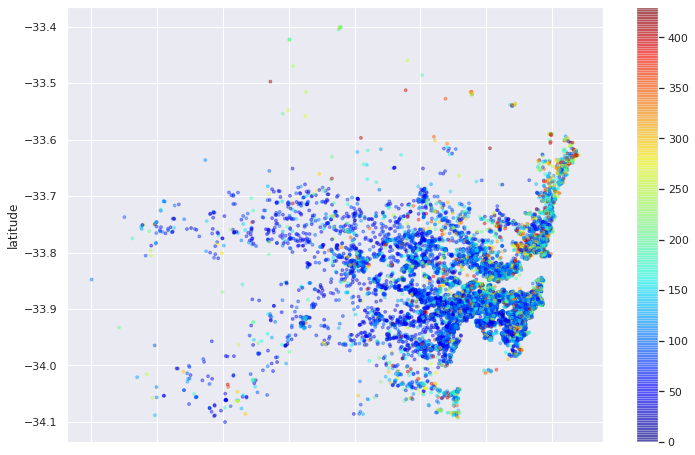

In [58]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [71]:
# Adicionando um quarto de hotel para comparação
dfq = df_p[df_p['room_type'] == 'Private room']
dfr = dfq.drop(['room_type', 'count'], axis=1)
dfh = dfr.append({'neighbourhood': 'Hotel', 'mean_price': 140}, ignore_index=True)
dfh = dfh.sort_values('mean_price', ascending=False)
dfh.head()

,neighbourhood,mean_price
38,Hotel,140.000000
0,Pittwater,115.179104
1,Mosman,101.619718
2,Manly,97.513605
3,Penrith,97.127660


Comparando o valor do quarto de hotel mais barato com a média de preço de um quarto privado no centro de Sydney.

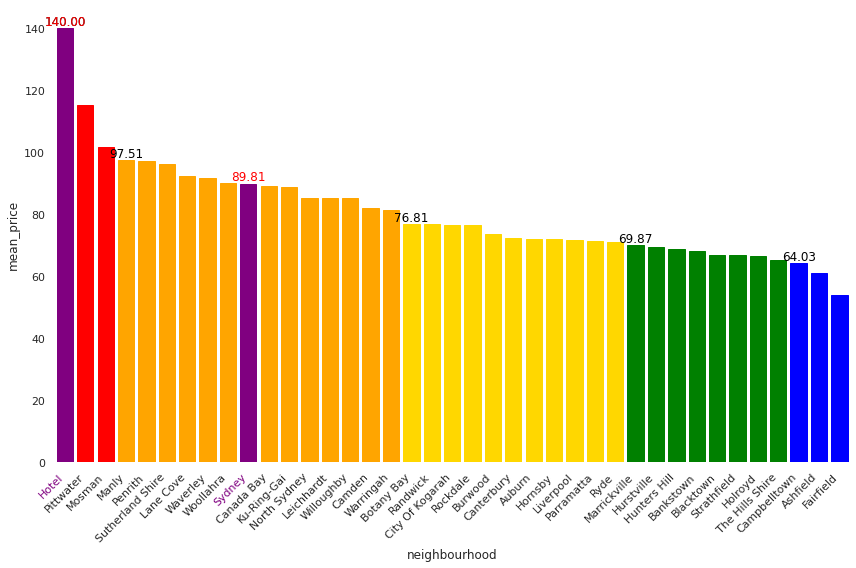

In [172]:
sns.set_style("white")

plt.figure(figsize=(12,8))

chart = sns.barplot(x=dfh.neighbourhood, y=dfh.mean_price)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
firstred = True
firstorange = True
firstgold = True
firstgreen = True
firstblue = True
for bar in chart.patches:
    if bar.get_height() > 100:
        bar.set_color('red')    
        if firstred:
            chart.text(bar.get_x() + bar.get_width()/2., bar.get_height(), '%.2f' % float(bar.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')
        firstred = False
    elif bar.get_height() > 80:
        bar.set_color('orange')
        if firstorange:
            chart.text(bar.get_x() + bar.get_width()/2., bar.get_height(), '%.2f' % float(bar.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')
        firstorange = False
    elif bar.get_height() > 70:
        bar.set_color('gold')
        if firstgold:
            chart.text(bar.get_x() + bar.get_width()/2., bar.get_height(), '%.2f' % float(bar.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')
        firstgold = False
    elif bar.get_height() > 65:
        bar.set_color('green')
        if firstgreen:
            chart.text(bar.get_x() + bar.get_width()/2., bar.get_height(), '%.2f' % float(bar.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')
        firstgreen = False
    else:
        bar.set_color('blue')
        if firstblue:
            chart.text(bar.get_x() + bar.get_width()/2., bar.get_height(), '%.2f' % float(bar.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')
        firstblue = False
# chart.patches[0].set_color('black')
# chart.patches.get_xticklabels
count = 0
for x in chart.get_xticklabels():
  if (x.get_text() == 'Hotel') or (x.get_text() == 'Sydney'):
    # print(x.get_text())
    x.set_color('purple')
    chart.patches[count].set_color('purple')
    chart.text(chart.patches[count].get_x() + chart.patches[count].get_width()/2., chart.patches[count].get_height(), '%.2f' % float(chart.patches[count].get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')
  count = count + 1

sns.despine(top=True, right=True, left=True, bottom=True)

plt.tight_layout()

# **Conclusões**  

Olhando o mapa podemos ver que os locais mais caros se encontram no litoral da região. A zona central é relativamente mais barata que a litorânea porém um pouco mais cara que o resto das regiões. Como antigo morador da cidade aconselho se hospedar na região mais central pois dali terá acesso fácil a todas as outras regiões. O transporte público, tanto ônibus quanto metrô, funciona muito bem e te permite se deslocar facilmente entre as regiões. Fazendo uma pesquisa rápida encontrei nada data de hoje (21/06/2020) no site decolar.com o quarto de hotel para uma pessoa mais barato em Sydney custando R\$ 509,00 reais (aproximadamente AU\$ 140,00), e pelo gráfico criado acima podemos verificar que uma noite em um quarto privado na mesma região (Sydney) custa em média AU\$ 89,81 (R\$ 326,04). O quarto de hotel acabou sendo a opção mais cara dentre todas, portanto vale a pena buscar uma acomodação via Airbnb para visitar a cidade.